In [ ]:
# Import necessary libraries
# Import pandas library for data handling | کتابخانه پانداس برای کار با داده‌ها
import pandas as pd
# Read the CSV file into a DataFrame | خواندن فایل CSV و ساخت دیتا فریم
df=pd.read_csv('/content/Churn_Modelling.csv')
# Print first 5 rows to check data | نمایش ۵ سطر اول برای بررسی داده
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
##INFORMATION
# Show information about columns and data types | اطلاعات کلی درباره دیتافریم و نوع داده‌ها را نمایش می‌دهد
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Streaming output truncated to the last 5000 lines.
5000            False   False  
5001            False   False  
5002            False   False  
5003            False   False  
5004            False   False  
5005            False   False  
5006            False   False  
5007            False   False  
5008            False   False  
5009            False   False  
5010            False   False  
5011            False   False  
5012            False   False  
5013            False   False  
5014            False   False  
5015            False   False  
5016            False   False  
5017            False   False  
5018            False   False  
5019            False   False  
5020            False   False  
5021            False   False  
5022            False   False  
5023            False   False  
5024            False   False  
5025            False   False  
5026            False   False  
5027            False   False  
5028            False   False  
5029            False

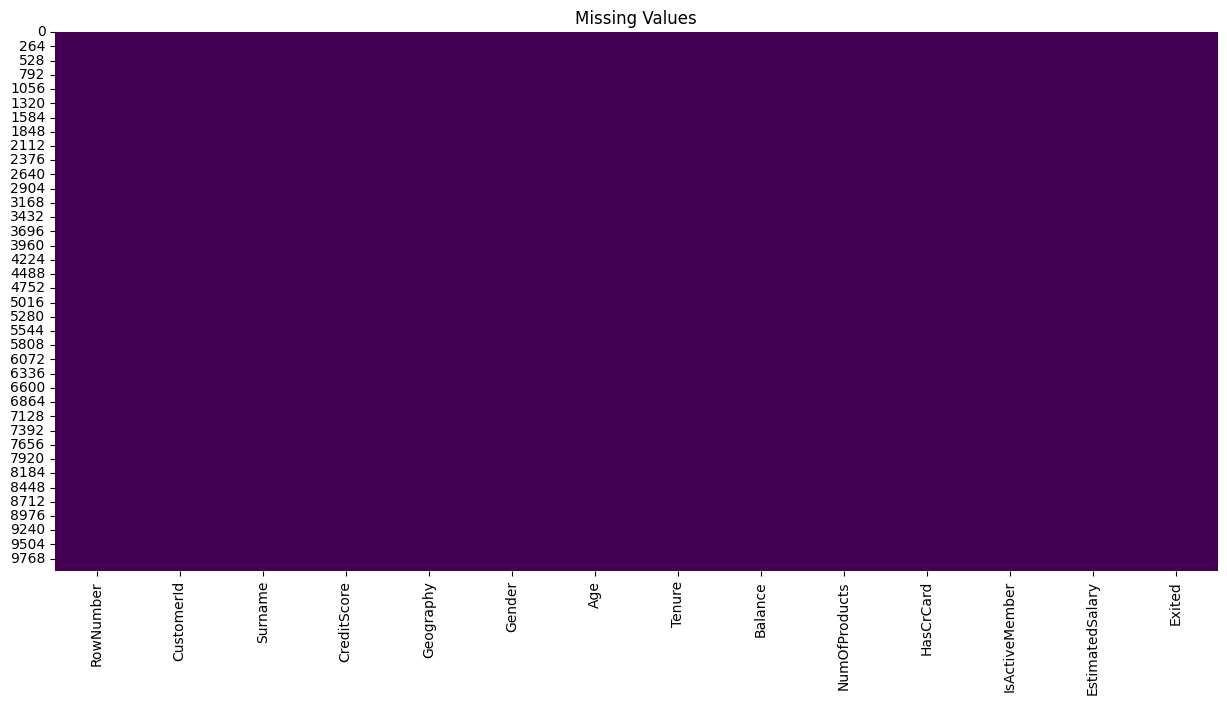

In [ ]:
#-----------------------------------------------------------
##Missing Values
#----------------------------------------------------------
#showing missing values
# Check for missing values (True where missing) | بررسی داده‌های گمشده (در صورت وجود True)
missing_values = df.isnull()
print("Missing Values:\n",missing_values)
#Import nessary libraries for visualization
# Import seaborn for visualization | کتابخانه سیبورن برای مصورسازی
import seaborn as sns
# Import matplotlib for plotting | کتابخانه matplotlib برای رسم نمودار
import matplotlib.pyplot as plt
# Set size of the heatmap | تنظیم سایز تصویر هیت‌مپ
plt.figure(figsize=(15,7))
# Draw heatmap for missing values | رسم هیت‌مپ برای داده‌های گمشده
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Missing Values')
plt.show()

In [ ]:
#----------------------------------------------------------
##OutLiers
#----------------------------------------------------------
#Import nessesary libraries for Outliers
import numpy as np
#Check which columns are numeric
# Check if each column is numeric | بررسی عددی بودن هر ستون
isnumeric=df.apply(lambda x:pd.api.types.is_number(x))
print("Numeric Columns:",isnumeric)
# Check if all columns are numeric | بررسی این‌که آیا همه ستون‌ها عددی هستند یا نه
allnum=isnumeric.all()
if allnum:
    print("all columns are numerical")
else:
    #if any column is not numerical
    print("There is non-numerical column/columns")
    # Find the non-numeric columns | پیدا کردن نام ستون‌های غیرعددی
    non_num=df.columns[~isnumeric]
#LList of non-numerical columns
    print("nun-numerical columns:",non_num )

Numeric Columns: RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool
There is non-numerical column/columns
nun-numerical columns: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


statistics gender  
    Gender  Exit Rate  Count
0  Female   0.250715   4543
1    Male   0.164559   5457
statistics gerogerahy 
   Geography  Exit Rate  Count
0    France   0.161548   5014
1   Germany   0.324432   2509
2     Spain   0.166734   2477


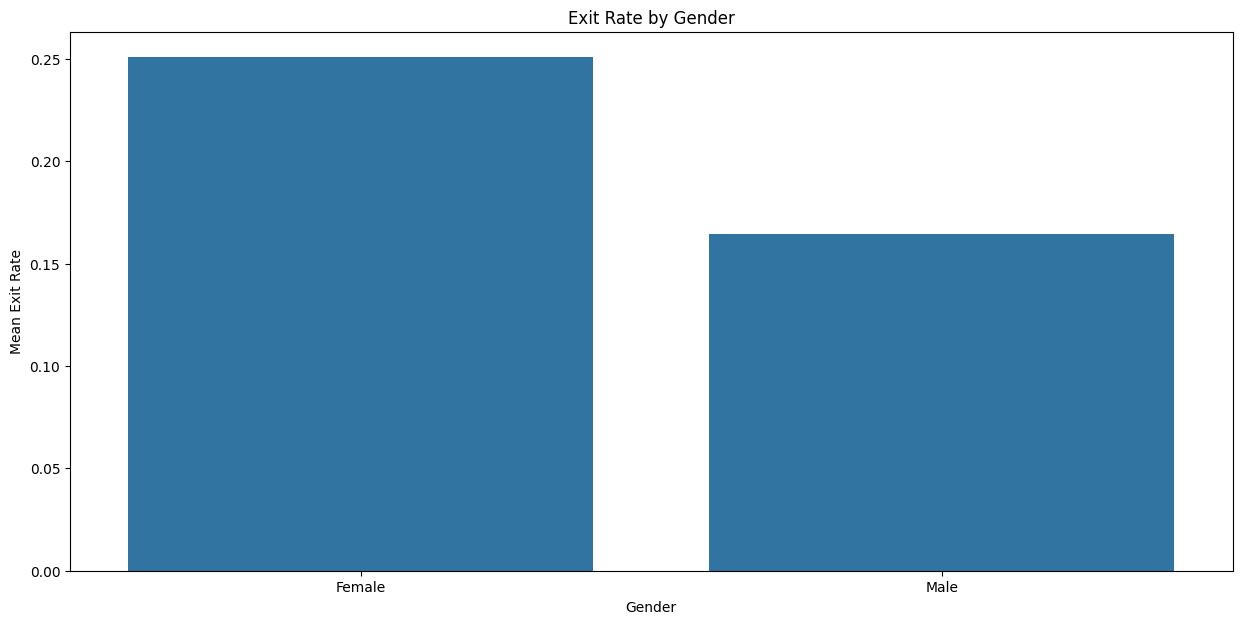

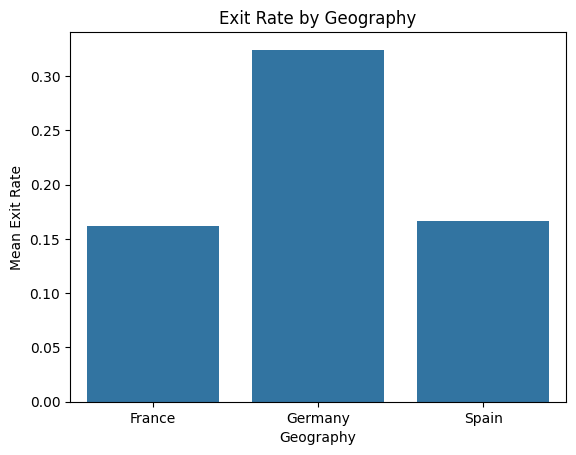

In [ ]:
#----------------------------------------------------------
#Analysis based on geographic region and gender
#----------------------------------------------------------
#import necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Descriptive statistics for gender
# List of columns to analyze | لیست ستون‌های مورد بررسی
columnsName=['Geography', 'Gender']
# Group by gender, calculate mean and count | گروه‌بندی بر اساس جنسیت و محاسبه میانگین و تعداد
genderSts = df.groupby('Gender')['Exited'].agg(['mean','count']).reset_index()
# Rename columns | تغییر نام ستون‌ها
genderSts.columns=['Gender','Exit Rate','Count']
print("statistics gender  \n",genderSts)
# Group by geography, calculate mean and count | گروه‌بندی بر اساس کشور و محاسبه میانگین و تعداد
geoSts=df.groupby('Geography')['Exited'].agg(['mean','count']).reset_index()
# Rename columns | تغییر نام ستون‌ها
geoSts.columns =['Geography','Exit Rate','Count']
print("statistics gerogerahy \n",geoSts)

 # Set figure size | تنظیم اندازه نمودار
plt.figure(figsize=(15,7))

#bar chart
# Barplot for gender exit rate | نمودار ستونی نرخ ریزش بر اساس جنسیت
sns.barplot(x='Gender', y='Exit Rate', data=genderSts)
plt.title('Exit Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Exit Rate')
plt.show()

# Barplot for geography exit rate | نمودار ستونی نرخ ریزش بر اساس کشور
sns.barplot(x='Geography', y='Exit Rate', data=geoSts)
plt.title('Exit Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Mean Exit Rate')
plt.show()

In [ ]:
# ----------------------------------------------------------
#delete features
import pandas as pd
df=pd.read_csv('/content/Churn_Modelling.csv')
# Drop column 'Surname' as it's not needed | حذف ستون Surname چون در مدل‌سازی کاربرد ندارد
df.drop(columns=['Surname'], inplace=True)
#df.to_csv('D:\\churnPrediction\\Churn_Modelling_upd.csv')

print(df)

      RowNumber  CustomerId  CreditScore Geography  Gender  Age  Tenure  \
0             1    15634602          619    France  Female   42       2   
1             2    15647311          608     Spain  Female   41       1   
2             3    15619304          502    France  Female   42       8   
3             4    15701354          699    France  Female   39       1   
4             5    15737888          850     Spain  Female   43       2   
5             6    15574012          645     Spain    Male   44       8   
6             7    15592531          822    France    Male   50       7   
7             8    15656148          376   Germany  Female   29       4   
8             9    15792365          501    France    Male   44       4   
9            10    15592389          684    France    Male   27       2   
10           11    15767821          528    France    Male   31       6   
11           12    15737173          497     Spain    Male   24       3   
12           13    156322

In [ ]:
#-----------------------------------------------------------
#Calculate IQR
import pandas as pd
# Select only numerical columns | فقط ستون‌های عددی را انتخاب می‌کند
num_columns = df.select_dtypes(include=['float64', 'int64'])
# Dictionary to store outlier indices | لیست ایندکس سطرهای پرت برای هر ستون
outlier={}
for cln in num_columns:
    # Calculate Q1 (25th percentile) | محاسبه چارک اول
    Q1=df[cln].quantile(0.25)
    # Calculate Q3 (75th percentile) | محاسبه چارک سوم
    Q3=df[cln].quantile(0.75)
    # Calculate IQR | محاسبه فاصله بین چارک‌ها
    IQR = Q3-Q1

 #define lower and upper bounds
 # Lower bound for outliers | حد پایین برای پرت‌ها
lower_b = Q1 - 1.5 * IQR
 # Upper bound for outliers | حد بالا برای پرت‌ها
upper_b = Q3 -1.5 * IQR
#find outlier for each column

# Find outlier indices | پیدا کردن ایندکس پرت‌ها
outlier_idx = df[(df[cln] < lower_b) | (df[cln] > upper_b)].index
outlier[cln] = outlier_idx.tolist()

for col,num in outlier.items():
    print(f"Outliers in {col}: {num}")

Outliers in Exited: [0, 2, 5, 7, 16, 22, 30, 35, 41, 43, 46, 47, 53, 54, 58, 70, 81, 86, 88, 90, 104, 105, 109, 114, 118, 125, 126, 127, 138, 139, 143, 144, 151, 155, 164, 166, 168, 172, 179, 184, 190, 202, 203, 206, 208, 215, 218, 219, 223, 224, 227, 228, 235, 237, 238, 243, 245, 249, 268, 271, 276, 279, 282, 293, 297, 306, 308, 316, 322, 327, 333, 335, 338, 339, 340, 357, 361, 376, 379, 392, 393, 399, 406, 413, 416, 420, 422, 429, 430, 433, 444, 448, 458, 463, 467, 471, 475, 484, 487, 493, 494, 499, 502, 514, 516, 518, 520, 528, 535, 538, 539, 543, 544, 551, 555, 557, 563, 566, 571, 573, 581, 584, 585, 586, 589, 590, 598, 600, 603, 615, 617, 630, 631, 634, 640, 643, 644, 645, 653, 677, 685, 687, 688, 696, 697, 705, 714, 720, 721, 729, 733, 734, 743, 761, 762, 764, 767, 769, 770, 774, 776, 777, 784, 805, 813, 817, 823, 838, 840, 843, 851, 856, 859, 860, 861, 867, 868, 871, 880, 881, 883, 893, 894, 898, 900, 904, 905, 907, 916, 921, 922, 933, 936, 942, 946, 947, 949, 954, 963, 964, 976

In [9]:
#-----------------------------------------------------------
#evaluation of outlier
import pandas as pd
num_col = df.select_dtypes(include=['float64', 'int64']).columns
#calculate mean
mean_val = df[num_col].mean()
std_val = df[num_col].std()
summary = pd.DataFrame({'Mean': mean_val, 'Std': std_val})
print(summary)

                         Mean           Std
RowNumber        5.000500e+03   2886.895680
CustomerId       1.569094e+07  71936.186123
CreditScore      6.505288e+02     96.653299
Age              3.892180e+01     10.487806
Tenure           5.012800e+00      2.892174
Balance          7.648589e+04  62397.405202
NumOfProducts    1.530200e+00      0.581654
HasCrCard        7.055000e-01      0.455840
IsActiveMember   5.151000e-01      0.499797
EstimatedSalary  1.000902e+05  57510.492818
Exited           2.037000e-01      0.402769


In [ ]:
#-----------------------------------------------------------
#Remove outlier and calculate z-score
import pandas as pd
import numpy as np
# Import scipy for statistical functions | وارد کردن سای‌پای برای توابع آماری
from scipy import stats
# Get numerical columns | گرفتن ستون‌های عددی
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) > 0:
     # Compute absolute Z-score for each value | محاسبه Z-score برای هر مقدار
    z_scores=np.abs(stats.zscore(df[num_cols]))

    # Define Z-score threshold for outlier | حد آستانه Z-score برای پرت (معمولاً ۳)
    threshold = 3
    # Find where Z-score exceeds threshold | پیدا کردن داده‌های پرت 
    outlier = z_scores >threshold
    # Identify rows with outliers | سطرهایی که حداقل یک ستون عددی‌شان پرت است
    rows_ = np.any(outlier,axis=1)
    # Create new DataFrame without outlier rows | حذف داده‌های پرت و ذخیره در دیتافریم جدید
    df_cleaned = df[~rows_]
    print("Number of rows removed:", np.sum(rows_))
else:
     print("not available numerical columns")


Number of rows removed: 201


In [ ]:
#------------------------------------------------------
#calculate stast
def calculate_stats(df):
   
    num_col = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(num_col)>0:
        mean_val=df[num_col].mean()
        sts_val =df[num_col].std()
        stats_data = {
                'Mean': mean_val,
                'Standard Deviation': std_val
            }
        stats_tbl= pd.DataFrame(stats_data)
        print(stats_tbl)

    else:
        print("no numerical columns")

orginal = calculate_stats(df)
cleaned= calculate_stats(df_cleaned)
print(orginal)
print(cleaned)

                         Mean  Standard Deviation
RowNumber        5.000500e+03         2886.895680
CustomerId       1.569094e+07        71936.186123
CreditScore      6.505288e+02           96.653299
Age              3.892180e+01           10.487806
Tenure           5.012800e+00            2.892174
Balance          7.648589e+04        62397.405202
NumOfProducts    1.530200e+00            0.581654
HasCrCard        7.055000e-01            0.455840
IsActiveMember   5.151000e-01            0.499797
EstimatedSalary  1.000902e+05        57510.492818
Exited           2.037000e-01            0.402769
                         Mean  Standard Deviation
RowNumber        4.996748e+03         2886.895680
CustomerId       1.569096e+07        71936.186123
CreditScore      6.505867e+02           96.653299
Age              3.838443e+01           10.487806
Tenure           5.011532e+00            2.892174
Balance          7.647268e+04        62397.405202
NumOfProducts    1.515461e+00            0.581654


In [12]:
#-----------------------------------------------------------
#emove outliers from the DataFrame using the Z-score

import pandas as pd
import numpy as np
from scipy import stats

def remove_outlier(df):
    num_col = df.select_dtypes(include=[np.number]).columns.tolist()

    if len(num_col) > 0:

        zscore = np.abs(stats.zscore(df[num_col]))
        threshold = 3
        outlier = (zscore > threshold)
        rows_ = np.any(outlier,axis=1)
        df_cleaned = df[~rows_]
        print(df_cleaned)
        return df_cleaned


df_cleaned = remove_outlier(df)

#df_cleaned.to_csv('D:\\churnPrediction\\Cleaned.csv')

print(df_cleaned)

Streaming output truncated to the last 5000 lines.
4899       1  
4900       0  
4901       1  
4902       0  
4903       0  
4904       0  
4905       0  
4906       0  
4907       0  
4908       1  
4909       0  
4910       0  
4911       1  
4912       1  
4913       1  
4914       0  
4915       0  
4916       0  
4917       0  
4918       1  
4919       0  
4920       0  
4921       1  
4922       1  
4923       0  
4924       0  
4925       0  
4926       0  
4927       1  
4928       0  
4929       0  
4930       0  
4932       0  
4933       0  
4934       0  
4935       0  
4936       1  
4937       0  
4938       0  
4939       1  
4940       0  
4941       1  
4942       0  
4943       0  
4944       0  
4945       0  
4946       1  
4947       0  
4948       0  
4949       0  
4950       0  
4951       0  
4952       0  
4953       0  
4954       0  
4955       0  
4956       0  
4957       0  
4958       0  
4959       0  
4960       0  
4961       0  
4962       0  
4963

In [ ]:
#-----------------------------------------------------------
#select categorical columns
# Find categorical columns | یافتن ستون‌های غیرعددی (Categorical)
cat_col = df.select_dtypes(include=['object']).columns

uq_values = []
for col in cat_col:
     # Unique values for each categorical column | مقادیر یکتا در هر ستون کاتگوریکال
     uq_val = df[col].unique()
     # Store name and unique values | ذخیره نام و مقدارها
     uq_values.append((col,uq_val))
     # Display as DataFrame | نمایش به صورت دیتافریم
     unique_values_df = pd.DataFrame(uq_values)
# Show all rows of DataFrame | نمایش کامل ردیف‌های دیتافریم
pd.set_option('display.max_rows', None)  
print(unique_values_df)

           0                         1
0  Geography  [France, Spain, Germany]
1     Gender            [Female, Male]


Frequency of values in column 'Geography':
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


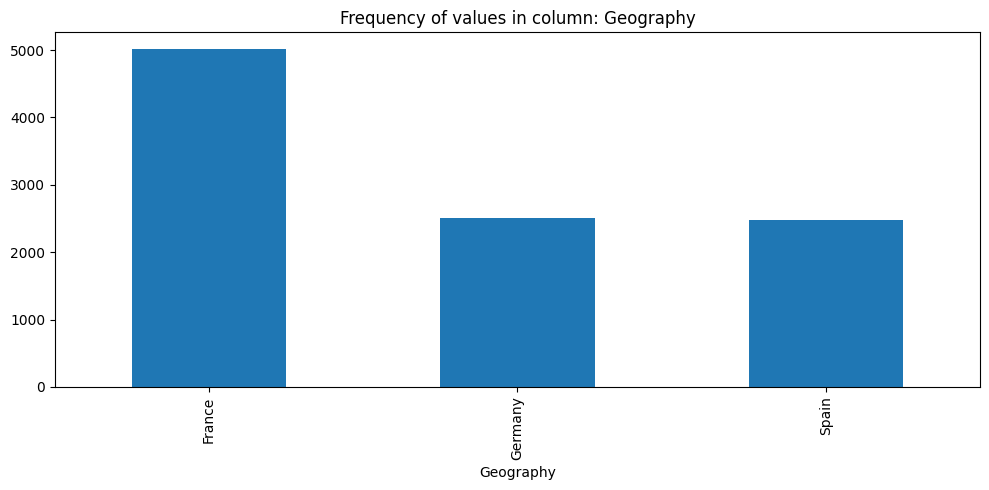

Frequency of values in column 'Gender':
Gender
Male      5457
Female    4543
Name: count, dtype: int64


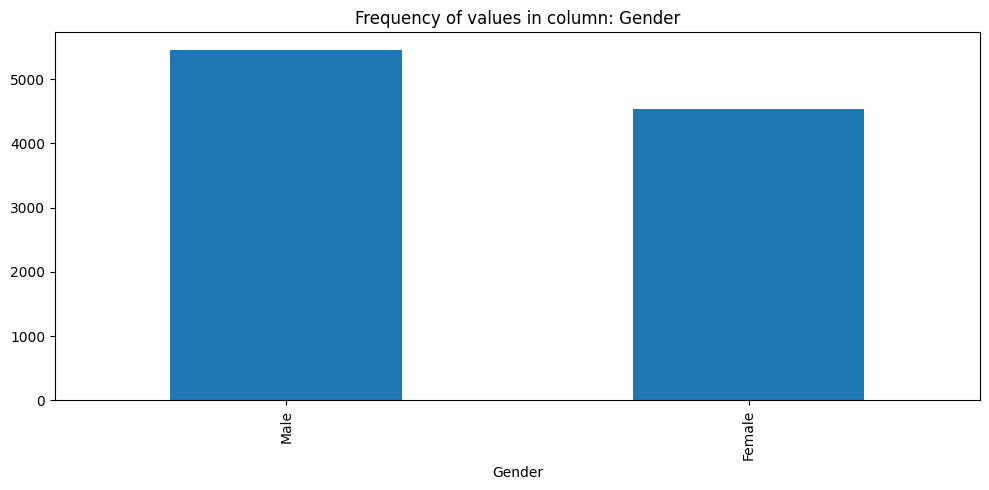

In [14]:
#-----------------------------------------------------------
#show diagram and calculate unique values for each categorical
import pandas as pd
import matplotlib.pyplot as plt
cat_cols = df.select_dtypes(include=['object']).columns
for i,col in enumerate(cat_cols):
      print(f"Frequency of values in column '{col}':")
      val_cnt= df[col].value_counts()
      print(val_cnt)
      val_cnt.plot(kind='bar',figsize=(10,5),title=f'Frequency of values in column: {col}')
      plt.tight_layout()
      plt.show()

In [ ]:
#-----------------------------------------------------------
# use on-hot encoding for categorical columns
import pandas as pd
# Select categorical columns | ستون‌هایی که نوع‌شان object است
cat_cols1=df_cleaned.select_dtypes(include=['object']).columns.tolist()
# Apply one-hot encoding and drop first to avoid dummy trap | اعمال وان-هات انکودینگ و حذف اولین مقدار از هر ستون
df_encoded = pd.get_dummies(df_cleaned, columns=cat_cols1, drop_first=True)

print("\nFinal dataset after One-Hot Encoding:")

print(df_encoded.head())


Final dataset after One-Hot Encoding:
   RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42       2       0.00              1   
1          2    15647311          608   41       1   83807.86              1   
2          3    15619304          502   42       8  159660.80              3   
3          4    15701354          699   39       1       0.00              2   
4          5    15737888          850   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0          1               1        101348.88       1              False   
1          0               1        112542.58       0              False   
2          1               0        113931.57       1              False   
3          0               0         93826.63       0              False   
4          1               1         79084.10       0              False   

   Geography_Spain  Gen

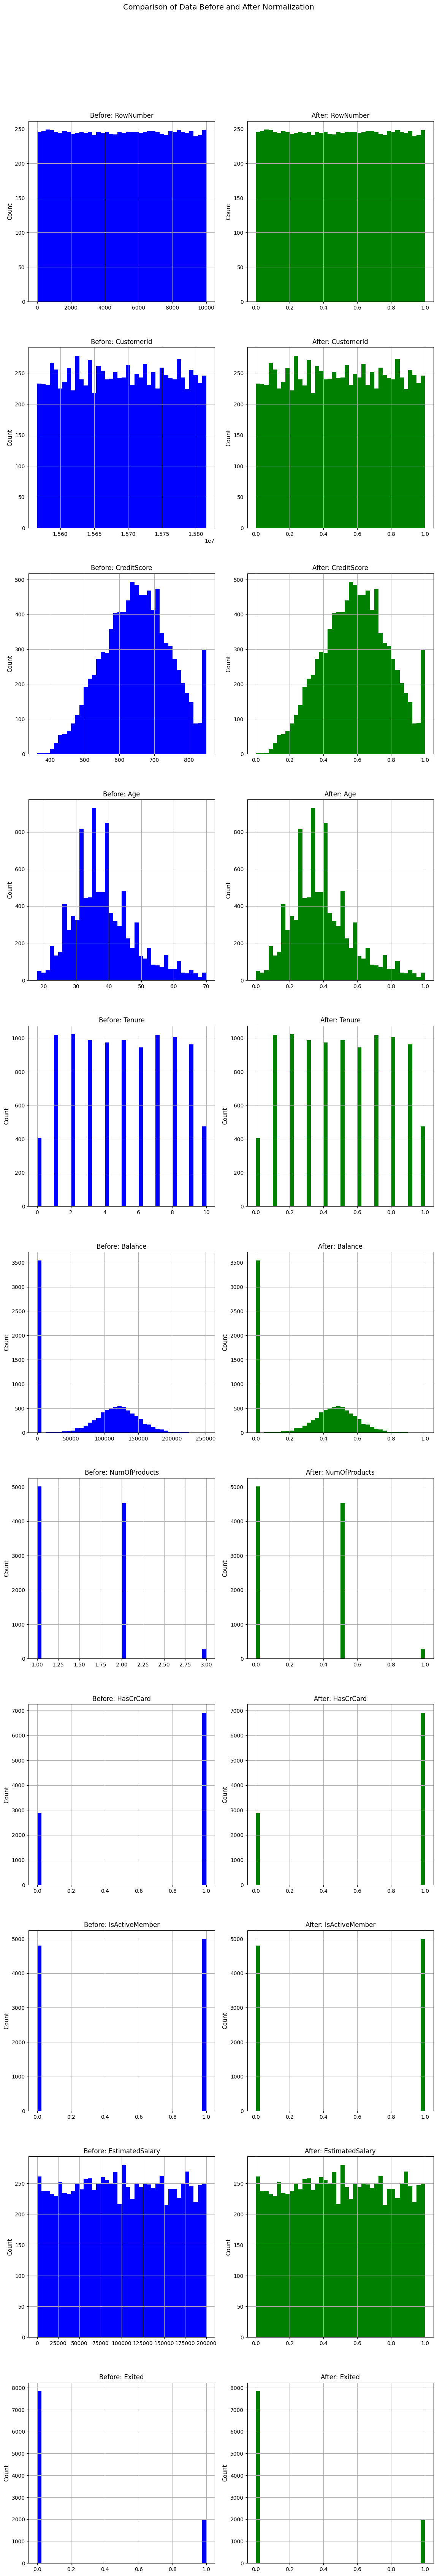

In [ ]:
#Normalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import MinMaxScaler for normalization | ایمپورت MinMaxScaler برای نرمال‌سازی
from sklearn.preprocessing import MinMaxScaler

# فرض بر اینکه df_encoded تعریف شده باشد

# Make a copy before normalization | ساخت یک نسخه قبل از نرمال‌سازی
df_before = df_encoded.copy()

# نرمال‌سازی مین-مکس
sc = MinMaxScaler()
# Find all numerical columns | یافتن همه ستون‌های عددی
num_col2 = df_encoded.select_dtypes(include=[np.number]).columns
# Apply min-max scaling | اعمال نرمال‌سازی مین-مکس
df_encoded[num_col2] = sc.fit_transform(df_encoded[num_col2])

# تعداد ستون‌های عددی
num_col3 = len(num_col2)
rows_1 = num_col3
cols = 2

# ساخت figure و axs با فاصله زیاد بین سطرها
fig, axs = plt.subplots(rows_1, cols, figsize=(12, 6 * num_col3), sharex=False, sharey=False)

# عنوان کل
fig.suptitle('Comparison of Data Before and After Normalization', fontsize=14, y=1.03)

# Plot histograms before and after normalization
for i, column in enumerate(num_col2):
    # قبل از نرمال سازی
    ax_before = axs[i, 0]
    df_before[column].hist(bins=40, color='blue', ax=ax_before)
    ax_before.set_title(f'Before: {column}', fontsize=12)
    ax_before.set_ylabel('Count', fontsize=11)
    #ax_before.tick_params(axis='x', labelsize=10)
    #ax_before.grid(False)

    # بعد از نرمال سازی
    ax_after = axs[i, 1]
    df_encoded[column].hist(bins=40, color='green', ax=ax_after)
    ax_after.set_title(f'After: {column}', fontsize=12)
    ax_after.set_ylabel('Count', fontsize=11)
    #ax_after.tick_params(axis='x', labelsize=10)
    #ax_after.grid(False)


# plt.tight_layout(pad=5.0, h_pad=4.5, w_pad=2.5, rect=[0, 0, 1, 0.97])
# plt.subplots_adjust(top=0.95, hspace=1.0, wspace=0.35)
plt.subplots_adjust(top=0.95, hspace=0.9, wspace=0.3)

plt.tight_layout(pad=2.5, h_pad=4, w_pad=1)
plt.show()

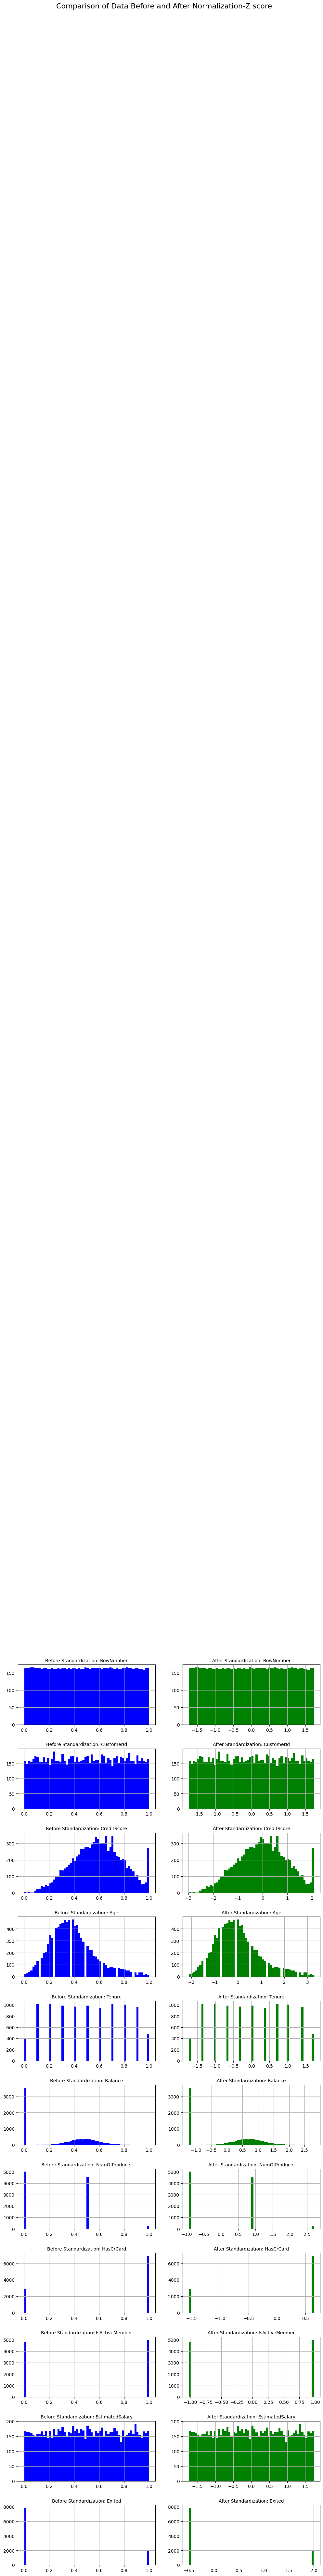

In [17]:
#**********************************************************
#normaliztion using z-score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

sc_z = StandardScaler()
#use copy of the original dataset

df_standard= df_encoded.copy()  # Make a copy of the original dataset
df_standard[num_col2] = sc_z.fit_transform(df_encoded[num_col2])

# Number of numeric columns
num_cols_z= len(num_col2)
#create rows based on features num
rows_z = num_cols_z
cols_z = 2
#show figure size based on number of row
fig, axs = plt.subplots(rows_z, cols, figsize=(12, 3 * num_cols_z))
#set Subtitle
fig.suptitle('Comparison of Data Before and After Normalization-Z score', fontsize=16, y=2.50)
# Plot histograms  before and after normalization
for i, column in enumerate(num_col2):
        # Plot before normalization
    ax_before_z = axs[i, 0]
    df_encoded[column].hist(bins=60, color='blue', ax=ax_before_z)
    ax_before_z.set_title(f'Before Standardization: {column}', fontsize=10)

    # Plot after standardization
    ax_after_z = axs[i, 1]
    df_standard[column].hist(bins=60, color='green', ax=ax_after_z)
    ax_after_z.set_title(f'After Standardization: {column}', fontsize=10)

plt.subplots_adjust(top=0.95, hspace=0.4)
plt.show()


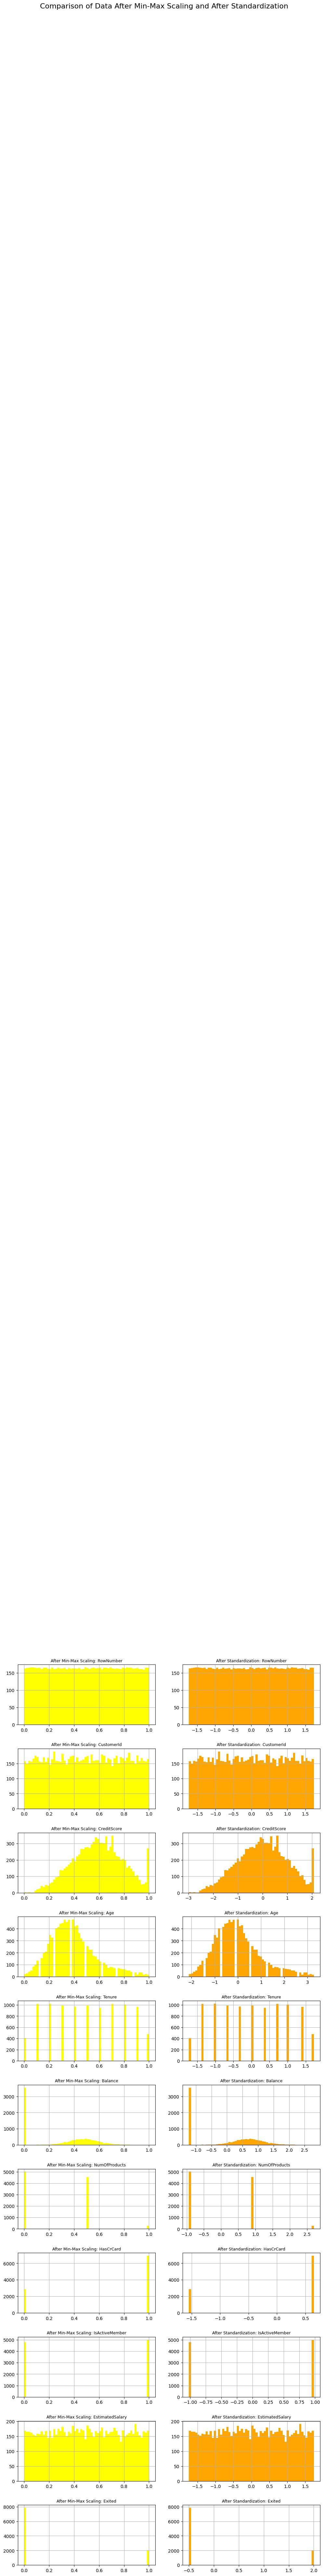

      RowNumber  CustomerId  CreditScore       Age    Tenure   Balance  \
0     -1.729510   -0.783687    -0.327879  0.374169 -1.041776 -1.225443   
1     -1.729164   -0.606962    -0.442063  0.270681 -1.387705  0.117543   
2     -1.728818   -0.996412    -1.542374  0.374169  1.033798  1.333055   
3     -1.728472    0.144531     0.502545  0.063705 -1.387705 -1.225443   
4     -1.728125    0.652553     2.069970  0.477658 -1.041776  0.785816   
5     -1.727779   -1.626219    -0.057992  0.581146  1.033798  0.597446   
6     -1.727433   -1.368703     1.779321  1.202075  0.687869 -1.225443   
8     -1.726741    1.410081    -1.552754  0.581146 -0.349918  1.050867   
9     -1.726394   -1.370678     0.346840 -1.178154 -1.041776  0.931529   
10    -1.726048    1.068785    -1.272486 -0.764201  0.341940  0.409333   
11    -1.725702    0.642611    -1.594276 -1.488619 -0.695847 -1.225443   
12    -1.725356   -0.816198    -1.812262 -0.453737  1.725655 -1.225443   
13    -1.725010    0.007270    -1.0545

In [18]:
#*******************************************8
#merge min&max and Z-score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_col_m = df_encoded.select_dtypes(include=[np.number]).columns
#Start:MinMaxScaler
min_max_sc = MinMaxScaler()
df_min_max_sc = df_encoded.copy()
df_min_max_sc[num_col_m ] = min_max_sc.fit_transform(df_encoded[num_col_m ])
#end:MinMaxScaler
#Start:Z-Score
zScore = StandardScaler()
df_standardized_f = df_min_max_sc.copy()
df_standardized_f[num_col_m] = zScore.fit_transform(df_min_max_sc[num_col_m])
#end:z-score

num_col_f = len(num_col_m)
rows_f = num_col_f
col_f = 2
fig, axs = plt.subplots(rows_f, col_f, figsize=(12, 3 * num_col_f))
fig.suptitle('Comparison of Data After Min-Max Scaling and After Standardization', fontsize=16, y=2.50)
for i, column in enumerate(num_col_m):
    ax_min_max = axs[i, 0]
    df_min_max_sc[column].hist(bins=60, color='Yellow', ax=ax_min_max)
    ax_min_max.set_title(f'After Min-Max Scaling: {column}', fontsize=9)

    ax_standardized = axs[i, 1]
    df_standard[column].hist(bins=60, color='orange', ax=ax_standardized)
    ax_standardized.set_title(f'After Standardization: {column}', fontsize=9)

plt.subplots_adjust(top=0.95, hspace=0.4)
plt.show()

print(df_standard)

In [ ]:
#-------------------------------------------------------------------
#training 880% data and validation 20%
import pandas as pd
# Import train_test_split for splitting the data | ایمپورت تابع تقسیم داده به آموزش و تست
from sklearn.model_selection import train_test_split
# Split the DataFrame into features (X) and target variable (Y) based on exited feature
# Features: Other columns except target | متغیرهای ورودی (بدون ستون هدف)
X = df_encoded.drop('Exited', axis=1)
# Target: Churn column | متغیر هدف یعنی ریزش
y = df_encoded['Exited']
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
print(f"Training data (X_train): {X_train.shape}")
print(f"Test data (X_test): {X_test.shape}")
print(f"Training target (y_train): {y_train.shape}")
print(f"Test target (y_test): {y_test.shape}")

Training data (X_train): (7839, 13)
Test data (X_test): (1960, 13)
Training target (y_train): (7839,)
Test target (y_test): (1960,)


Accuracy Rate:0.814795918367347

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1548
         1.0       0.65      0.25      0.37       412

    accuracy                           0.81      1960
   macro avg       0.74      0.61      0.63      1960
weighted avg       0.79      0.81      0.78      1960



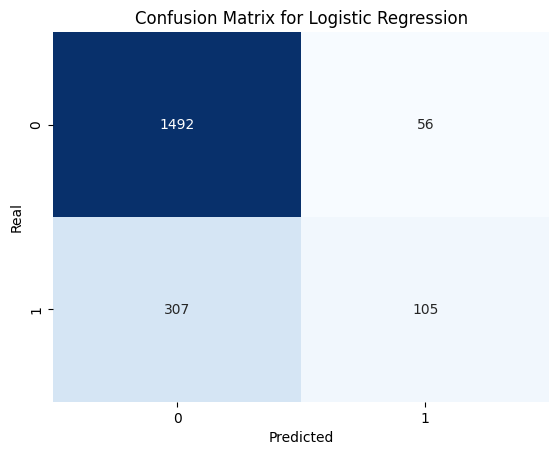

In [ ]:
#------------------------------------------------------
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Create logistic regression model | ساخت مدل رگرسیون لجستیک
log_reg_mdl = LogisticRegression()
# Train model with training data | آموزش مدل با داده آموزش
log_reg_mdl.fit(X_train, y_train)
# Predict churn for test data | پیش‌بینی مقادیر ریزش برای داده تست
y_pred = log_reg_mdl.predict(X_test)
# Calculate accuracy score | محاسبه دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Rate:"+ str(accuracy))

 # Print classification metrics | گزارش معیارهای دسته‌بندی مدل
print("\nClassification Report:")
print( classification_report(y_test, y_pred))
# Create the confusion matrix | ساخت ماتریس آشفتگی
conf_mtx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

Confusion Matrix:
[[1492   56]
 [ 307  105]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1548
         1.0       0.65      0.25      0.37       412

    accuracy                           0.81      1960
   macro avg       0.74      0.61      0.63      1960
weighted avg       0.79      0.81      0.78      1960



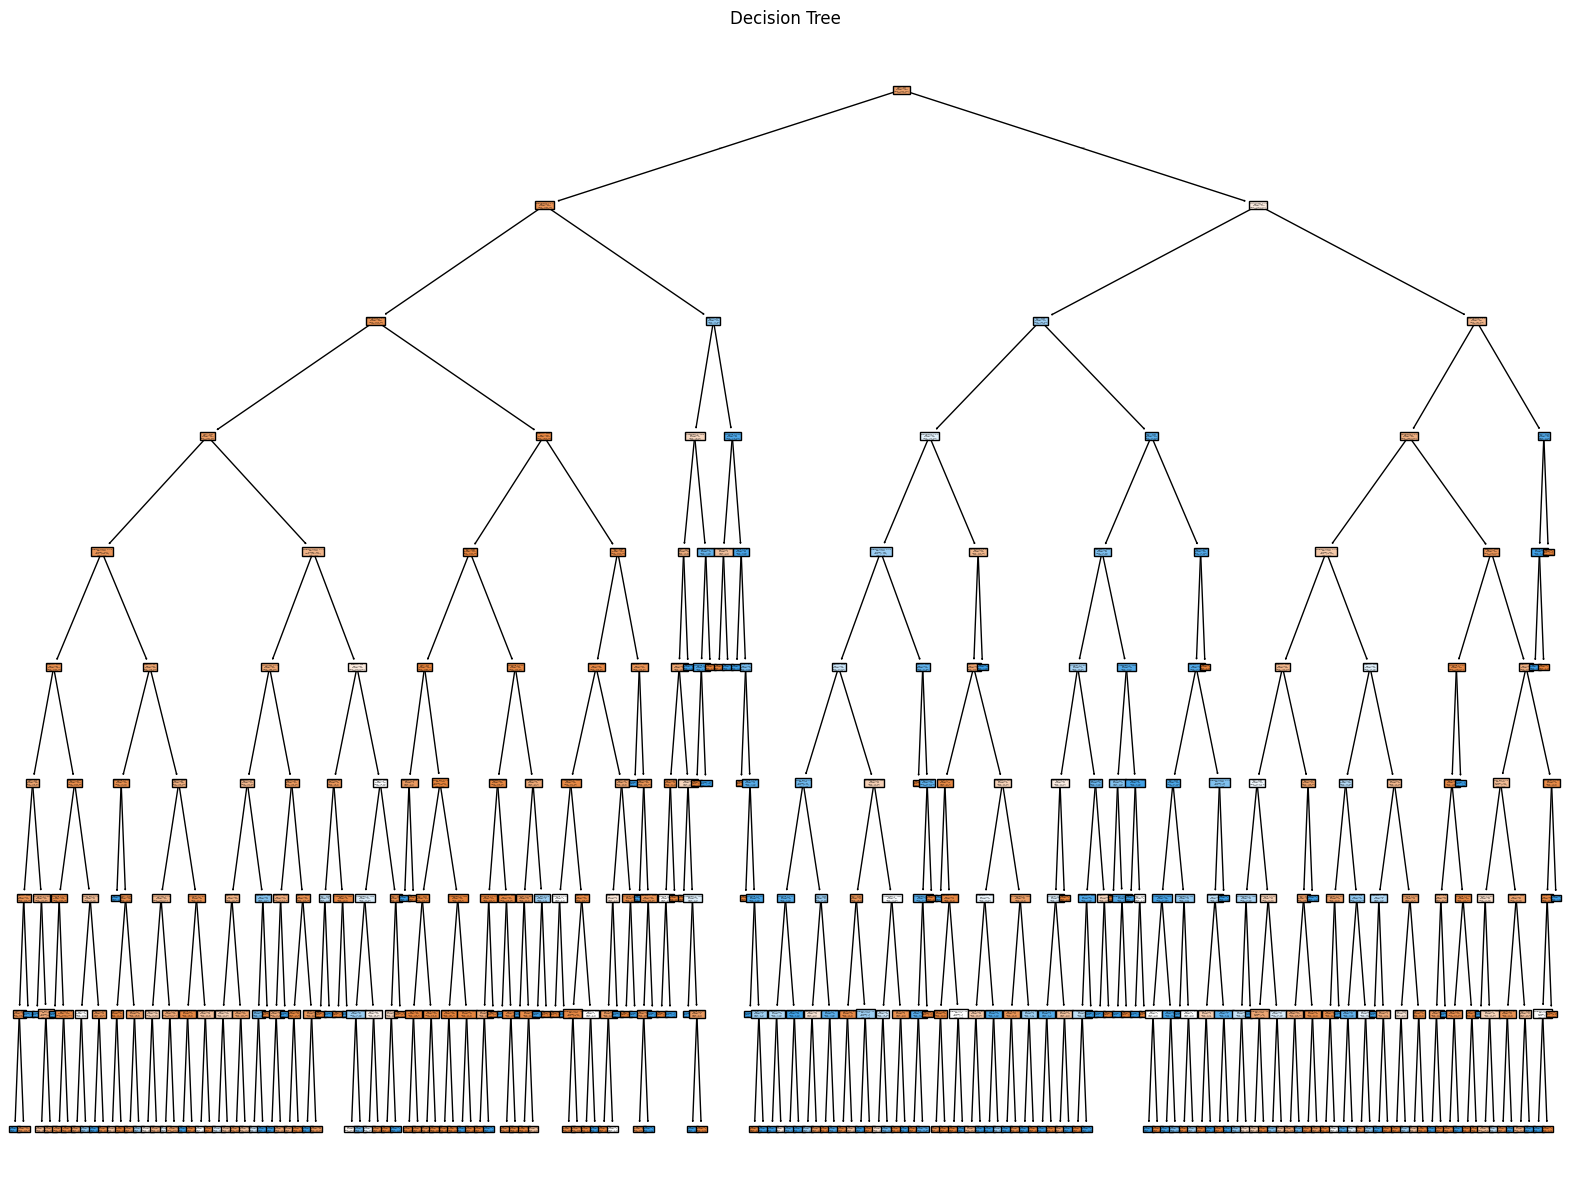

In [ ]:
#------------------------------------------------
#Decision Tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Import DecisionTree tools | وارد کردن ابزارهای درخت تصمیم
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Create decision tree model with max depth | ساخت مدل درخت تصمیم با عمق حداکثر 9
tree_mdl = DecisionTreeClassifier(random_state=38, max_depth=9)
# Fit the tree on training data | آموزش مدل با داده‌های آموزش
tree_mdl.fit(X_train, y_train)
# Predict test labels | پیش‌ بینی با مدل روی داده تست
predict = tree_mdl.predict(X_test)
print("Confusion Matrix:")
# Compute confusion matrix | محاسبه ماتریس آشفتگی
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(20, 15))
tree.plot_tree(tree_mdl, filled=True, feature_names=X_train.columns, class_names=['False', 'True'])
plt.title('Decision Tree')
plt.show()


XGBoost Accuracy:0.8479591836734693

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1548
         1.0       0.71      0.47      0.56       412

    accuracy                           0.85      1960
   macro avg       0.79      0.71      0.74      1960
weighted avg       0.84      0.85      0.84      1960



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


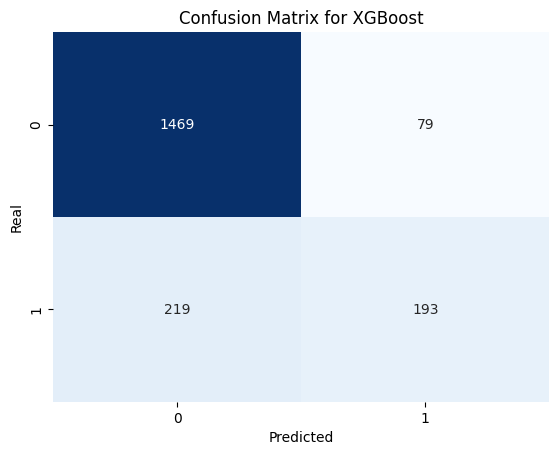

In [ ]:
#-----------------------------------------------

#xgboost model
# Import XGBoost classifier | وارد کردن مدل XGBoost
from xgboost import XGBClassifier  # Import XGBoost
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#Create the XGBoost classifier model with specific parameters
# ساخت مدل XGBoost با تنظیمات خاص (بدون label encoder و معیار ارزیابی mlogloss)
xgb_mdl = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
#Train the XGBoost model on the training data
# آموزش مدل XGBoost با داده‌های آموزش (train)
xgb_mdl.fit(X_train, y_train)
# Predict the target values for the test data
# پیش‌بینی مقادیر خروجی برای داده‌های تست (test)
y_pred_xgb = xgb_mdl.predict(X_test)
# Compute accuracy of the model predictions
# محاسبه میزان دقت مدل
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy:"+ str(accuracy_xgb))
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
conf_mtx_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_mtx_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

Confusion Matrix:
[[1492   56]
 [ 307  105]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1548
         1.0       0.65      0.25      0.37       412

    accuracy                           0.81      1960
   macro avg       0.74      0.61      0.63      1960
weighted avg       0.79      0.81      0.78      1960

Gradient Boosting Accuracy : 0.814795918367347


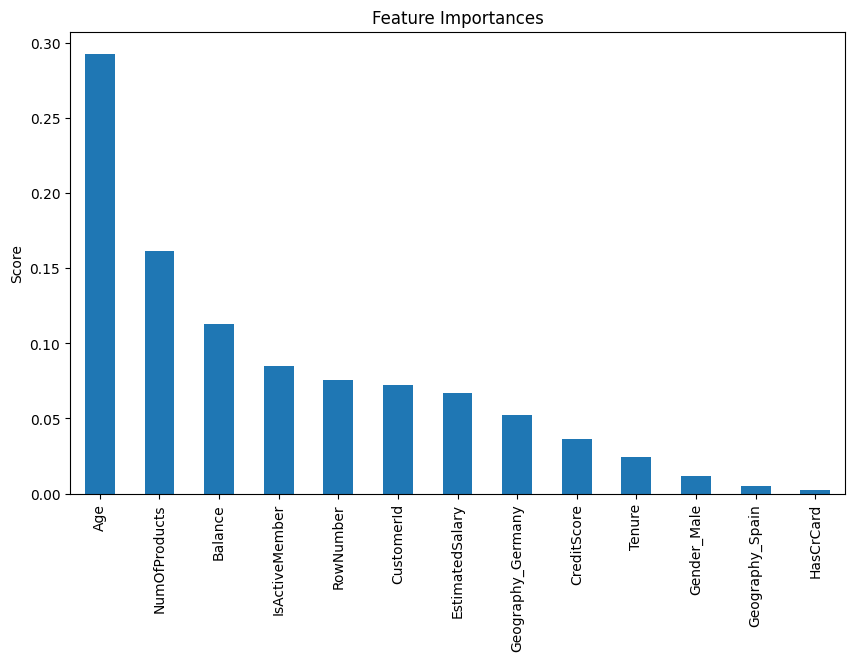

In [ ]:
#----------------------------------------------
#Gradient Boosting Classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Create a Gradient Boosting model with 100 trees, learning rate 0.2, max_depth 5
# ساخت مدل گرادیانت بوستینگ با ۱۰۰ درخت، نرخ یادگیری ۰.۲ و عمق ۵
gb_mdl = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=5, random_state=50)
# Create a Gradient Boosting model with 100 trees, learning rate 0.2, max_depth 5
# ساخت مدل گرادیانت بوستینگ با ۱۰۰ درخت، نرخ یادگیری ۰.۲ و عمق ۵
gb_mdl.fit(X_train, y_train)
# Predict labels of the test data using the trained model
# پیش‌بینی برچسب‌های داده تست توسط مدل آموزش دیده
gb_predict = gb_mdl.predict(X_test)
# Compute the confusion matrix between true and predicted labels
# محاسبه ماتریس آشفتگی بین برچسب‌های واقعی و پیش‌بینی شده ***(توجه: اینجا باید gb_predict باشه!)*
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
# Create a classification report (precision, recall, F1-score) for model results
# تولید گزارش دسته‌بندی شامل precision، recall و F1 برای مدل *** (باز هم باید gb_predict باشه!) *
gb_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(gb_report)
# Calculate the accuracy of predictions
# محاسبه دقت مدل بر اساس پیش‌بینی‌ها *** اینجا هم باید gb_predict باشه! ***
accuracy_gb = accuracy_score(y_test, y_pred)
print("Gradient Boosting Accuracy :", str(accuracy_gb))
# Get feature importances from the trained model
# دریافت اهمیت ویژگی‌ها از مدل آموزش دیده
feature_importance = gb_mdl.feature_importances_
# Create a pandas Series with importance scores and feature names
# ساخت سری pandas با نمره اهمیت هر ویژگی و نام‌های ویژگی‌ها
imp = pd.Series(feature_importance, index=X.columns)
# Sort the importances descending (important features on top)
# ترتیب نزولی اهمیت ویژگی‌ها
imp = imp.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Score')
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.760204   0.693675  0.760204  0.721116
1              XGBoost  0.760204   0.693675  0.760204  0.721116
2    Gradient Boosting  0.760204   0.693675  0.760204  0.721116
3        Decision Tree  0.760204   0.693675  0.760204  0.721116


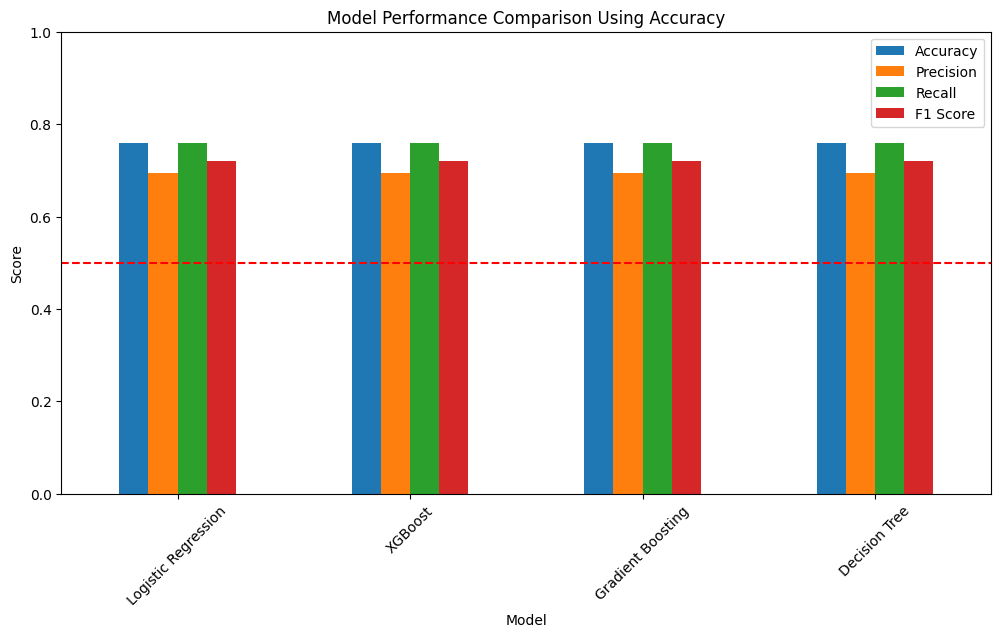

In [ ]:
#------------------------------------------------------------
#evaluation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
# Define features X by dropping the target column
# تعریف ویژگی‌ها با حذف ستون هدف ('Exited') از داده‌ها
X = df_encoded.drop('Exited', axis=1)
# Define target y as the 'Exited' column
# تعریف متغیر هدف (y) با قرار دادن ستون Exited
y = df_encoded['Exited']
# Split the dataset into training and testing sets (80% train, 20% test)
# تقسیم داده به آموزش و تست (۸۰٪ آموزش، ۲۰٪ تست)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Define a function to evaluate models and collect results
# تعریف تابع برای ارزیابی مدل‌ها و جمع‌آوری نتایج

def evaluate_mdl(model):
    # Empty list to store each model's results
    # ایجاد لیست خالی برای ذخیره نتایج هر مدل
    resVals = []
    for mdl, model_name in model:
        mdl.fit(X_train, y_train)
        predict_mdl = mdl.predict(X_test)
        accuracy_mdl = accuracy_score(y_test, y_pred)
        rpt_classification = classification_report(y_test, y_pred, output_dict=True)
         # Append model name, accuracy, precision, recall, F1 to results list
         # اضافه کردن نام مدل، دقت، دقت وزنی، recall و F1 به لیست نتایج
        resVals.append({ 'Model': model_name,'Accuracy': accuracy_mdl,
            'Precision': rpt_classification['weighted avg']['precision'],
            'Recall': rpt_classification['weighted avg']['recall'],
            'F1 Score': rpt_classification['weighted avg']['f1-score'] })
    return pd.DataFrame(resVals)

#list of Models
models = [
    (LogisticRegression(max_iter=200), "Logistic Regression"),
    (XGBClassifier(eval_metric='mlogloss', use_label_encoder=False), "XGBoost"),
    (GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42), "Gradient Boosting"),
    (DecisionTreeClassifier(random_state=42, max_depth=8), "Decision Tree")]
res_df = evaluate_mdl(models)

result = res_df.sort_values(by='Accuracy', ascending=False)
print(result)
# Bar plot for all key metrics for each model
# رسم نمودار ستونی برای نمایش دقت، precision، recall و F1 هر مدل
res_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison Using Accuracy')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()


In [ ]:
#Deep Neural network
# Import TensorFlow library for deep learning
# ایمپورت کتابخانه تنسورفلو برای یادگیری عمیق
import tensorflow as tf
#Import Sequential model API from Keras (high-level API on top of TensorFlow)
# ایمپورت مدل ترتیبی Keras که ساده‌ترین حالت ساخت مدل در Keras است
from tensorflow.keras.models import Sequential
# Import Dense (fully connected) and Input layers
# ایمپورت لایه Dense (کامل متصل) و لایه Input
from tensorflow.keras.layers import Dense, Input
# Number of input features (for example, 13 features in the dataset)
# تعیین تعداد ویژگی‌های ورودی مدل (مثلاً ۱۳ ویژگی در دیتاست)
inp_shape = 13

# Create a Sequential model object (stacking layers one after another)
# تعریف مدل ترتیبی (Sequential) برای افزودن لایه‌ها به صورت پشت سر هم
model = Sequential()

# Add an input layer with shape (13,)
# افزودن لایه ورودی با شکل (13،) با تعداد ویژگی‌های تعیین شده
model.add(Input(shape=(inp_shape,)))
# Add a dense hidden layer with 64 neurons and ReLU activation
# افزودن اولین لایه مخفی با ۶۴ نرون و تابع فعال‌سازی ReLU
model.add(Dense(64, activation='relu'))
# Add a second hidden layer with 128 neurons and ReLU activation
# افزودن دومین لایه مخفی با ۱۲۸ نرون و تابع فعال‌سازی ReLU (لایه عمیق‌تر)
model.add(Dense(128, activation='relu'))
# Add a third hidden layer with 64 neurons, again using ReLU
# افزودن سومین لایه مخفی با ۶۴ نرون و تابع فعال‌سازی ReLU (قرینه لایه اول)
model.add(Dense(64, activation='relu'))
# Add output layer with 1 neuron and sigmoid activation (for binary classification)
# افزودن لایه خروجی با ۱ نرون و تابع فعال‌سازی سیگموید (مناسب برای دسته‌بندی دودویی)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# - Optimizer: 'adam' is an adaptive learning rate optimization algorithm
# - Loss function: 'binary_crossentropy' is suitable for binary classification
# - Metrics: 'accuracy' to monitor model accuracy during training and evaluation
# Compile the model with specified optimizer, loss and metrics
# کامپایل مدل با بهینه‌ساز، تابع هزینه و معیار ارزیابی مشخص شده
model.compile(optimizer='adam'  # Optimizer algorithm used for updating weights
    # الگوریتم آدام جهت بهینه‌سازی وزن‌ها
        ,
               loss='binary_crossentropy'# Loss function for binary classification
    # تابع هزینه بر مبنای انتروپی متقاطع دودویی (مناسب دسته‌بندی دوتایی)
               , metrics=['accuracy'] # Which metrics to show during training
    # معیار ارزیابی مدل که accuracy انتخاب شده است
               )
# Print the summary of the model (architecture, parameters)
# نمایش خلاصه ساختار مدل و تعداد پارامترهای قابل آموزش
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,537 (68.50 KB)

 Trainable params: 17,537 (68.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training and evaluation of nerual network model
# Train the DNN model on the training data for 18 epochs with batch size 28,
# and evaluate validation metrics on the test set after each epoch.
# آموزش مدل شبکه عصبی روی داده‌های آموزش برای ۱۸ دوره (epoch) با اندازه دسته ۲۸،
# و ارزیابی عملکرد مدل روی داده‌های تست بعد از هر دوره (validation_data).
history = model.fit(X_train, y_train, epochs=18, batch_size=28, validation_data=(X_test, y_test))

# Evaluate the model on the test data (X_test, y_test)
# Evaluate the model on the test set, returning loss and accuracy.
# ارزیابی مدل روی داده‌های تست (X_test, y_test)، مقادیر خطا (loss) و دقت (accuracy) را برمی‌گرداند
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy after evaluation
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/18
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7712 - loss: 0.5023 - val_accuracy: 0.8485 - val_loss: 0.3943
Epoch 2/18
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8253 - loss: 0.4149 - val_accuracy: 0.8505 - val_loss: 0.3720
Epoch 3/18
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8386 - loss: 0.3904 - val_accuracy: 0.8694 - val_loss: 0.3391
Epoch 4/18
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8573 - loss: 0.3455 - val_accuracy: 0.8709 - val_loss: 0.3330
Epoch 5/18
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8489 - loss: 0.3570 - val_accuracy: 0.8755 - val_loss: 0.3305
Epoch 6/18
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8451 - loss: 0.3640 - val_accuracy: 0.8735 - val_loss: 0.3254
Epoch 7/18
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8578 - loss: 0.3423 - val_accuracy: 0.8724 - val_loss: 0.3278
Epoch 8/18
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.3510 - val_accuracy: 0.